## Import libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

## download data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


## visualize

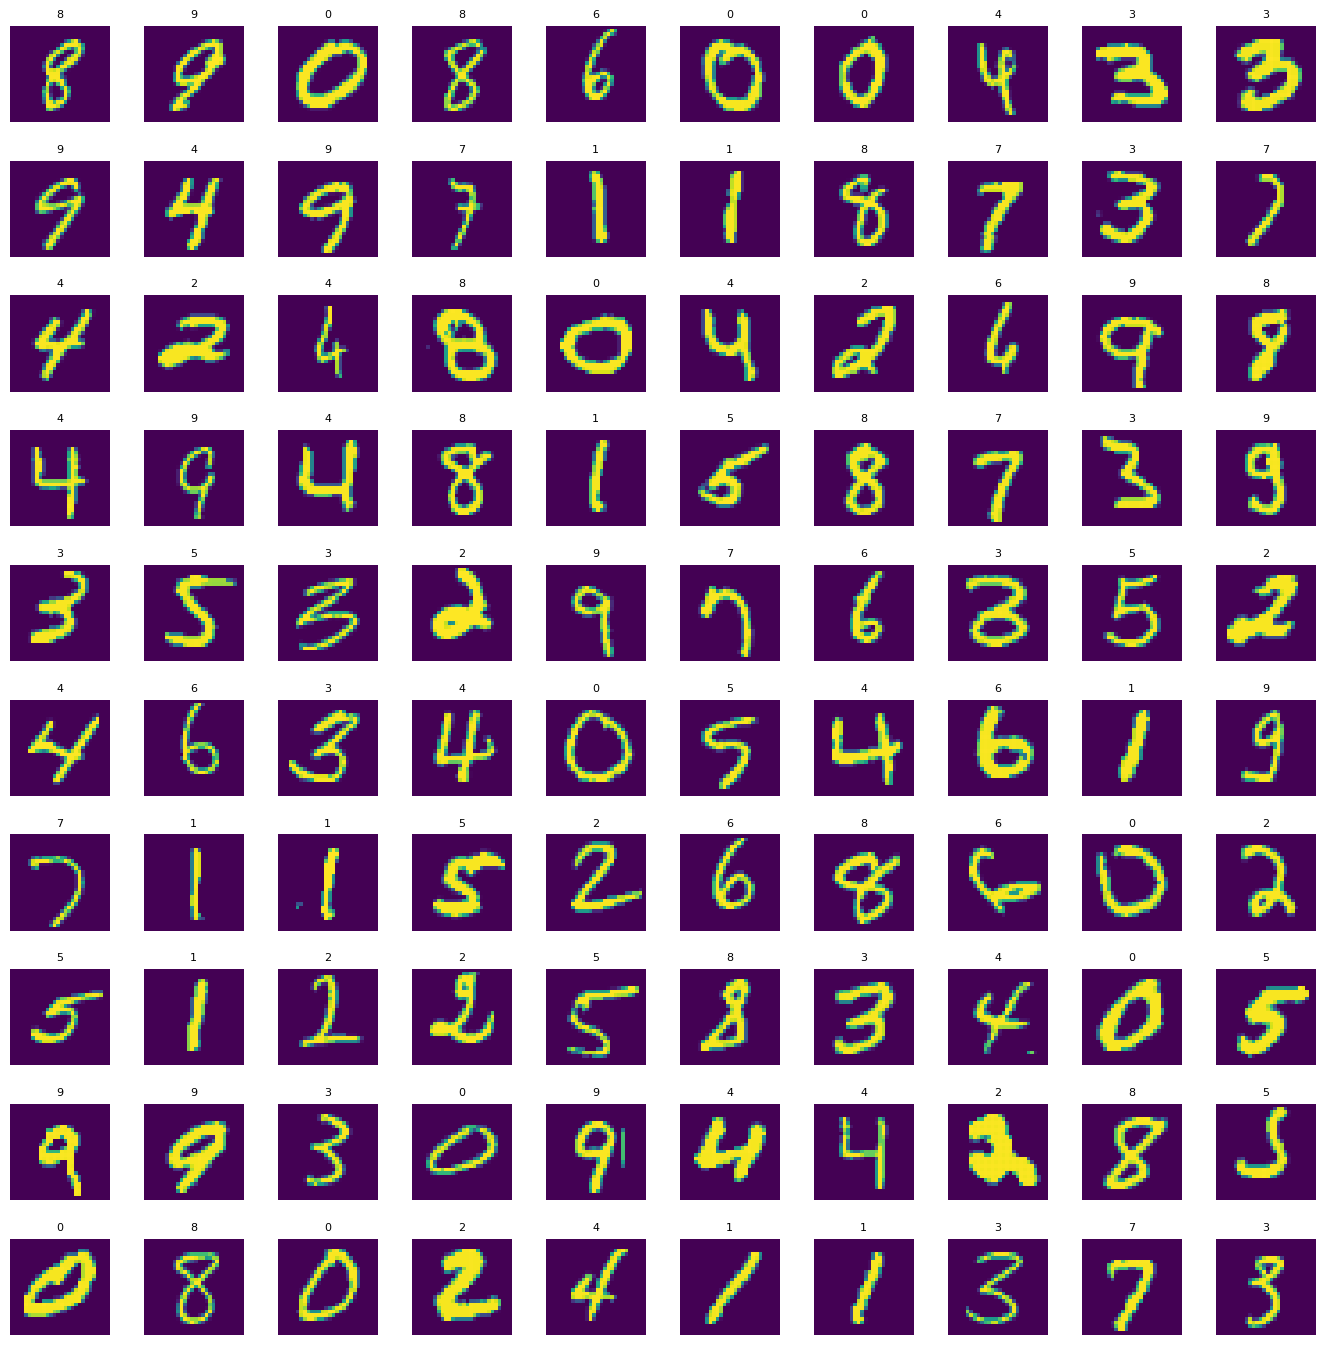

In [7]:
# Define the labels of the dataset
labels = [0,1,2,3,4,5,6,7,8,9]

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

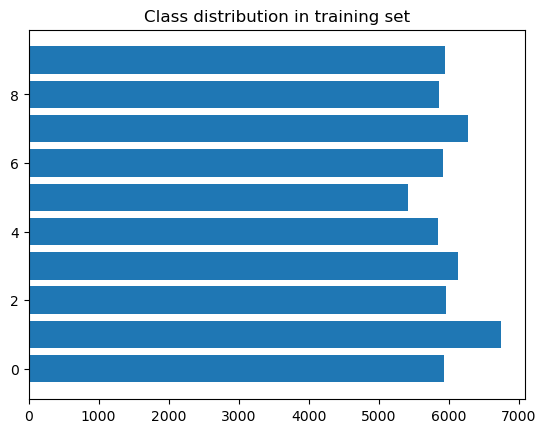

In [8]:
classes_name = [0,1,2,3,4,5,6,7,8,9]

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

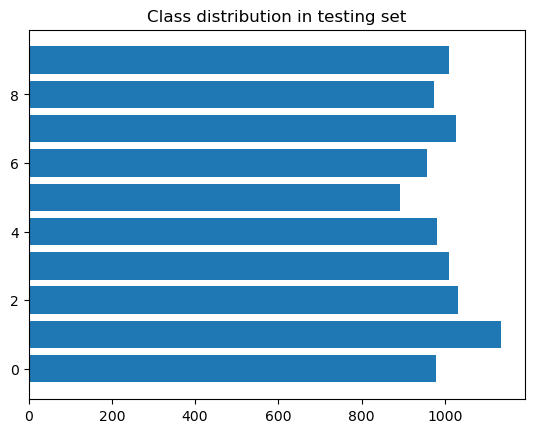

In [9]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

In [10]:
#assigning names of labels from 0 to 9 to array 'names'...
names=[0,1,2,3,4,5,6,7,8,9]

In [11]:
#checking the shape of images ...
X_train.shape

(60000, 28, 28)

In [12]:
#checking shape of labels...
y_train.shape

(60000,)

In [13]:
#dividing image pixel by 255 so that pixel comes in range 0 to 1...
training_images=X_train/255.0
testing_images=X_test/255.0

## Build Model Using ANN

In [45]:
#defining the model...
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),    
    tf.keras.layers.Dense(10,activation='softmax')
])

In [46]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,978 (328.04 KB)

 Trainable params: 83,978 (328.04 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
#compiling the model...
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
from tensorflow import keras

In [49]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
#training data to the model...
model.fit(training_images, y_train, epochs=50, validation_split=0.15, callbacks=[keras.callbacks.EarlyStopping(patience=10)], batch_size=50)

Epoch 1/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1481 - loss: 2.2765 - val_accuracy: 0.3400 - val_loss: 2.1761
Epoch 2/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4170 - loss: 2.1177 - val_accuracy: 0.6144 - val_loss: 1.8295
Epoch 3/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6427 - loss: 1.7072 - val_accuracy: 0.7467 - val_loss: 1.2305
Epoch 4/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7406 - loss: 1.1393 - val_accuracy: 0.8112 - val_loss: 0.7982
Epoch 5/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7959 - loss: 0.7896 - val_accuracy: 0.8487 - val_loss: 0.5996
Epoch 6/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8327 - loss: 0.6290 - val_accuracy: 0.8696 - val_loss: 0.4961
Epoch 7/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8559 - loss: 0.5297 - val_accuracy: 0.8813 - val_loss: 0.4347
Epoch 8/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8662 - loss: 0.4783 - 

In [51]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(testing_images,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9335 - loss: 0.2185


In [52]:
print("Test accuracy:",test_acc)

Test accuracy: 0.9430000185966492


## Predict

In [53]:
#predicting the data...
predictions=model.predict(testing_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [54]:
#printing data predicted for 2nd index..
print(names[np.argmax(predictions[55])])

0


In [57]:
#actual data at index 2...
print(names[y_test[55]])

0


## Build Model Using CNN

In [158]:
#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

Training data:


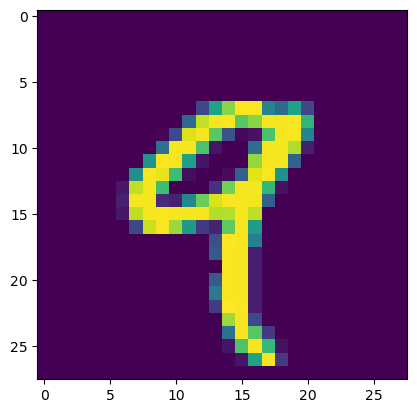

Label of this image is 9


In [159]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[4])
     

In [160]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [161]:
#normalising
xtrain=xtrain/255
xtest=xtest/255

In [163]:
#implementing one hot encoding
from keras.utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [164]:
#importing the model
from keras.models import Sequential

In [165]:
#creating model object
model=Sequential()

In [166]:
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [167]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))

In [168]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [169]:
#training the model
model.fit(xtrain,y_train,batch_size=100,epochs=5,validation_data=(xtest,y_test))     

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 62s 97ms/step - accuracy: 0.9068 - loss: 0.3028 - val_accuracy: 0.9888 - val_loss: 0.0343
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 57s 95ms/step - accuracy: 0.9872 - loss: 0.0389 - val_accuracy: 0.9908 - val_loss: 0.0262
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 58s 96ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9888 - val_loss: 0.0304
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 58s 96ms/step - accuracy: 0.9943 - loss: 0.0164 - val_accuracy: 0.9898 - val_loss: 0.0271
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 59s 98ms/step - accuracy: 0.9961 - loss: 0.0129 - val_accuracy: 0.9936 - val_loss: 0.0208


In [170]:
#model train and test scores
model.evaluate(xtrain,y_train),model.evaluate(xtest,y_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9981 - loss: 0.0059
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9920 - loss: 0.0242


([0.00596145773306489, 0.9982666373252869],
 [0.020799115300178528, 0.9936000108718872])

## Again CNN beats ANN on images set